In [121]:
import json
import pandas as pd

import pymysql
from sqlalchemy import create_engine

### Load the two data sets

#### Information on data:
- Booking data for 2 hotels 
- Both hotels are located in Portugal: H1 at the resort region of Algarve and H2 at the city of Lisbon
- Source: https://www.sciencedirect.com/science/article/pii/S2352340918315191

In [122]:
h1 = pd.read_csv('../data/H1.csv')
h2 = pd.read_csv('../data/H2.csv')
#df = df.sample(n=df.shape[0])

In [123]:
h1.shape, h2.shape

((40060, 31), (79330, 31))

In [124]:
h1.tail()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
40055,0,212,2017,August,35,31,2,8,2,1,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,143,NULL,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,0,169,2017,August,35,30,2,9,2,0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250,NULL,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,0,204,2017,August,35,29,4,10,2,0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250,NULL,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,0,211,2017,August,35,31,4,10,2,0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,40,NULL,0,Contract,112.80,0,1,Check-Out,2017-09-14
40059,0,161,2017,August,35,31,4,10,2,0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,69,NULL,0,Transient,99.06,0,0,Check-Out,2017-09-14


In [125]:
h2.index += h1.shape[0]

In [126]:
h2.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
40060,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
40061,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
40062,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
40063,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
40064,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [127]:
h1.columns == h2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [128]:
h1['Hotel'] = 'H1'
h2['Hotel'] = 'H2'

### Merge into one data frame

In [129]:
df = h1.append(h2)

In [130]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Hotel
0,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,H1
1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,H1
2,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,H1
3,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,H1
4,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03,H1


In [131]:
df1

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Hotel
0,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,Not applicable,Not applicable,0,Transient,0.00,0,0,Check-Out,2015-07-01,H1
1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,Not applicable,Not applicable,0,Transient,0.00,0,0,Check-Out,2015-07-01,H1
2,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,Not applicable,Not applicable,0,Transient,75.00,0,0,Check-Out,2015-07-02,H1
3,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,Not applicable,0,Transient,75.00,0,0,Check-Out,2015-07-02,H1
4,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,Not applicable,0,Transient,98.00,0,1,Check-Out,2015-07-03,H1
5,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,Not applicable,0,Transient,98.00,0,1,Check-Out,2015-07-03,H1
6,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,Not applicable,Not applicable,0,Transient,107.00,0,0,Check-Out,2015-07-03,H1
7,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303,Not applicable,0,Transient,103.00,0,1,Check-Out,2015-07-03,H1
8,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,Not applicable,0,Transient,82.00,0,1,Canceled,2015-05-06,H1
9,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15,Not applicable,0,Transient,105.50,0,0,Canceled,2015-04-22,H1


In [132]:
df.shape

(119390, 32)

In [133]:
df.CustomerType.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: CustomerType, dtype: int64

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
IsCanceled                     119390 non-null int64
LeadTime                       119390 non-null int64
ArrivalDateYear                119390 non-null int64
ArrivalDateMonth               119390 non-null object
ArrivalDateWeekNumber          119390 non-null int64
ArrivalDateDayOfMonth          119390 non-null int64
StaysInWeekendNights           119390 non-null int64
StaysInWeekNights              119390 non-null int64
Adults                         119390 non-null int64
Children                       119386 non-null float64
Babies                         119390 non-null int64
Meal                           119390 non-null object
Country                        118902 non-null object
MarketSegment                  119390 non-null object
DistributionChannel            119390 non-null object
IsRepeatedGuest                119390 non-null int64
PreviousCancellations          119

### Cleaning data

In [135]:
df1 = df.copy()

#### Deal with missing values:

In [136]:
missing = df1.isnull().sum()

In [137]:
missing[missing>0]

Children      4
Country     488
dtype: int64

In [138]:
df1.Children.value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: Children, dtype: int64

Replace Nan for Children with '0' and Country with 'Unknown':

In [139]:
values = {'Country': 'Unknown', 'Children': 0}
df1 = df1.fillna(value=values)

#### Detect columns with NULL values and handle them:

In [140]:
for column in df1.columns.values:
    nulls = df1[df1[column].astype(str).str.contains('NULL')]
    if nulls.shape[0] > 0:
        print(column, nulls.shape[0])

Agent 16340
Company 112593


Replace with 'Not applicable' as the booking didn't come from an agent or company:

In [141]:
df1.Agent = df1.Agent.str.replace('NULL', 'Not applicable')
df1.Company = df1.Company.str.replace('NULL', 'Not applicable')

#### Handle outliers:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x131595128>,
      dtype=object)

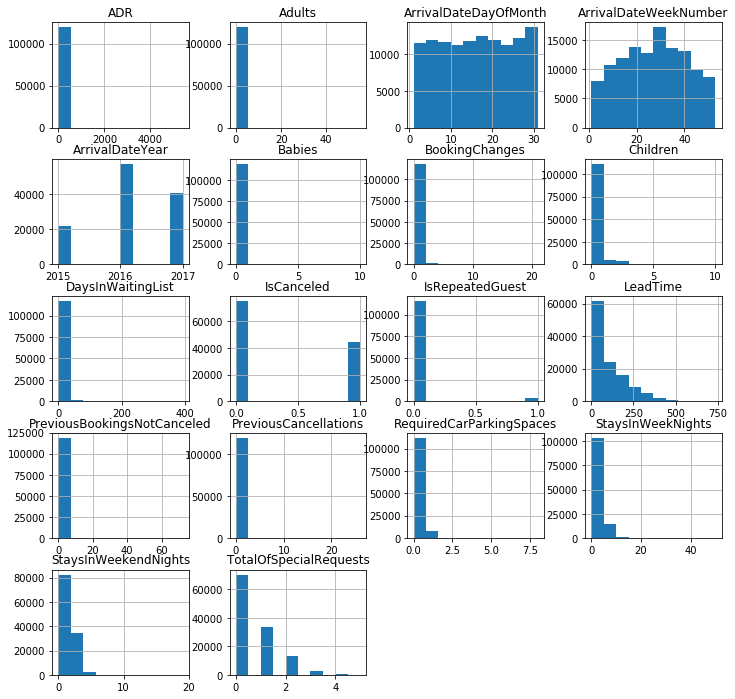

In [142]:
df1.hist(figsize=(12,12))

#### ADR

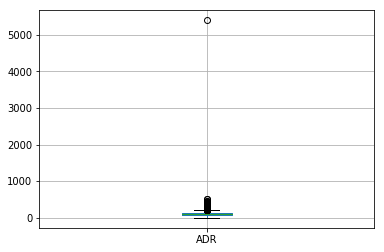

In [143]:
df1.boxplot('ADR')

In [144]:
df1[df1.ADR >5000]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Hotel
48515,1,35,2016,March,13,25,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,12,Not applicable,0,Transient,5400.0,0,0,Canceled,2016-02-19,H2


Remove the row with ADR of 5400:

In [145]:
df1.drop(df1.loc[df1.ADR == 5400].index, inplace=True)

In [146]:
df1[df1.ADR < 0]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Hotel
14969,0,195,2017,March,10,5,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273,Not applicable,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,H1


Remove the neative ADR too:

In [147]:
df1.drop(df1.loc[df1.ADR == -6.38].index, inplace=True)

#### Adults

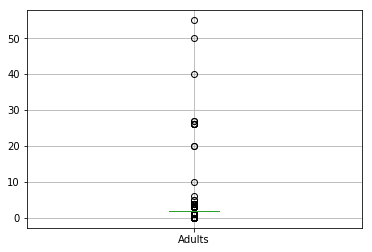

In [148]:
df1.boxplot('Adults')

In [149]:
df1[df1.Adults >15]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Hotel
1539,1,304,2015,September,36,3,0,3,40,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,Not applicable,Not applicable,0,Group,0.0,0,0,Canceled,2015-01-02,H1
1587,1,333,2015,September,36,5,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96,Not applicable,0,Group,0.0,0,0,Canceled,2015-01-02,H1
1643,1,336,2015,September,37,7,1,2,50,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,Not applicable,Not applicable,0,Group,0.0,0,0,Canceled,2015-01-18,H1
1752,1,340,2015,September,37,12,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96,Not applicable,0,Group,0.0,0,0,Canceled,2015-01-02,H1
1884,1,347,2015,September,38,19,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96,Not applicable,0,Group,0.0,0,0,Canceled,2015-01-02,H1
1917,1,349,2015,September,39,21,1,3,27,0.0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,Not applicable,Not applicable,0,Group,0.0,0,0,Canceled,2015-01-02,H1
1962,1,352,2015,September,39,24,1,3,27,0.0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,Not applicable,Not applicable,0,Group,0.0,0,0,Canceled,2015-01-02,H1
2003,1,354,2015,September,39,26,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96,Not applicable,0,Group,0.0,0,0,Canceled,2015-01-02,H1
2164,1,361,2015,October,40,3,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96,Not applicable,0,Group,0.0,0,0,Canceled,2015-01-02,H1
2173,1,338,2015,October,41,4,2,0,55,0.0,0,HB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,Not applicable,Not applicable,0,Group,0.0,0,0,Canceled,2015-01-02,H1


Will keep these as these are all canceled and this could be significant for the model to detect potential trend for cancelling booking 

#### Babies

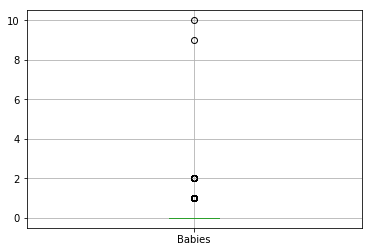

In [150]:
df1.boxplot('Babies')

In [151]:
df1[df1.Babies > 3]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Hotel
46619,0,37,2016,January,3,12,0,2,2,0.0,10,BB,PRT,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,9,Not applicable,0,Transient,84.45,0,1,Check-Out,2016-01-14,H2
78656,0,11,2015,October,42,11,2,1,1,0.0,9,BB,GBR,Corporate,Corporate,0,0,0,A,B,1,No Deposit,95,Not applicable,0,Transient-Party,95.00,0,0,Check-Out,2015-10-14,H2


Will remove these as it seems weird 1 and 2 adults travelling with 9 and 10 babies.

In [152]:
df1.drop(df1.loc[df1.Babies >3].index, inplace=True)

#### Children

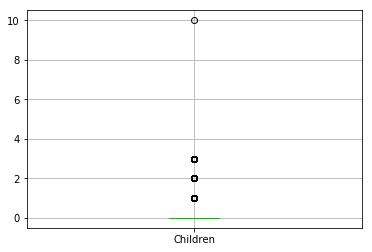

In [153]:
df1.boxplot('Children')

In [154]:
df1[df1.Children > 4]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Hotel
328,1,55,2015,July,29,12,4,10,2,10.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,2,No Deposit,8,Not applicable,0,Contract,133.16,0,1,No-Show,2015-07-12,H1


Will keep the above as it's a cancelled booking

#### Check for bookings where the number of Adults, Children & Babies is all 0

In [155]:
pd.set_option('display.max_columns', None)

In [156]:
df1[(df1.Adults == 0) & (df1.Children == 0) & (df1.Babies == 0) & (df1.ADR == 0) & (df1.StaysInWeekendNights == 0) 
    & (df1.StaysInWeekNights == 0)]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Hotel
2409,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,Not applicable,174,0,Transient,0.0,0,0,Check-Out,2015-10-12,H1
4127,1,0,2016,February,8,15,0,0,0,0.0,0,SC,Unknown,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,Not applicable,383,0,Transient,0.0,0,0,Canceled,2016-02-15,H1
9376,1,0,2016,November,48,21,0,0,0,0.0,0,SC,Unknown,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,Not applicable,386,0,Group,0.0,0,0,Canceled,2016-11-21,H1
61244,1,0,2016,December,50,6,0,0,0,0.0,0,SC,Unknown,Complementary,Corporate,0,0,0,P,P,0,No Deposit,Not applicable,279,0,Transient,0.0,0,0,Canceled,2016-12-06,H2
61245,1,0,2016,December,50,6,0,0,0,0.0,0,SC,Unknown,Complementary,Corporate,0,0,0,P,P,0,No Deposit,Not applicable,279,0,Transient,0.0,0,0,Canceled,2016-12-06,H2
61249,1,0,2016,December,50,6,0,0,0,0.0,0,SC,Unknown,Complementary,Corporate,0,0,0,P,P,0,No Deposit,Not applicable,279,0,Transient,0.0,0,0,Canceled,2016-12-06,H2
65907,1,0,2017,April,15,10,0,0,0,0.0,0,SC,Unknown,Complementary,Corporate,0,0,0,P,P,0,No Deposit,Not applicable,279,0,Transient,0.0,0,0,Canceled,2017-04-10,H2
65908,1,0,2017,April,15,10,0,0,0,0.0,0,SC,Unknown,Complementary,Corporate,0,0,0,P,P,0,No Deposit,Not applicable,279,0,Transient,0.0,0,0,Canceled,2017-04-10,H2
65909,1,0,2017,April,15,10,0,0,0,0.0,0,SC,Unknown,Complementary,Corporate,0,0,0,P,P,0,No Deposit,Not applicable,279,0,Transient,0.0,0,0,Canceled,2017-04-10,H2
65910,1,0,2017,April,15,10,0,0,0,0.0,0,SC,Unknown,Complementary,Corporate,0,0,0,P,P,0,No Deposit,Not applicable,279,0,Transient,0.0,0,0,Canceled,2017-04-10,H2


Will keep the above for now, but might reconsider removing based on the model results

### Loading to SQL

In [157]:
with open('/Users/laumaustupa/Desktop/Ironhack/Paroles/SQL.json') as cred_data:
    info = json.load(cred_data)
    
user = info['user']
pwd = info['password']

In [158]:
engine = create_engine('mysql+pymysql://'+ user + ':' + pwd +'@localhost/Iron_final_project')

In [159]:
df1.to_sql('df1_Hotels', engine, if_exists='replace', index=False)